<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> Brian James
    <Class>
    <Date>

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg
import math

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    reshaped_image = image.reshape((m,n))
    plt.imshow(reshaped_image,cmap="gray")

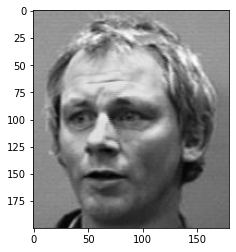

In [4]:
face = get_faces()[:,0]
show(face)

In [5]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path)
        self.mu = np.average(self.F,axis=1)
        self.Fbar = self.F - self.mu[:,None]
        self.U = linalg.svd(self.Fbar,full_matrices=False)[0]


    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return np.dot(self.U[:,:s].transpose(),A)

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        g_bar = g - self.mu # the image shifted by the mean
        g_hat = np.dot(self.U[:,:s].transpose(),g_bar) # the projection of the mean shifted image
        minimum = math.inf # initialize a minimum value for the for loop later on
        j = 0 # initialize an index of the closest image to g_hat
        f_hat = self.project(self.Fbar,s) # the projection of Fbar
        """Iterate through all the flattened images and compare them to g_hat. Find the image closest to g_hat"""
        for i in range(len(self.F[0])):
            val = linalg.norm(f_hat[:,i]-g_hat) # measure the distance between the two images
            if minimum > val: # compare and update the minimum distance
                minimum = val
                j = i # update the index of the closest image
        return j

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        closest_index = self.find_nearest(image,s) # retrieve the closest image in the database
        plt.subplot(121)
        show(image) # plot of the given image
        plt.subplot(122)
        show(self.F[:,closest_index]) # plot of the found match in the databse

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [6]:
face_rec = FacialRec()

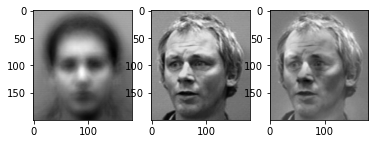

In [7]:
plt.subplot(131)
show(face_rec.mu)
plt.subplot(132)
show(face_rec.F[:,0])
plt.subplot(133)
show(face_rec.Fbar[:,0])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


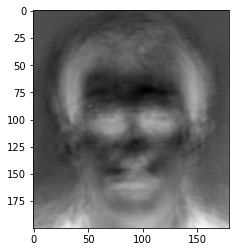

In [8]:
face_rec = FacialRec()
show(face_rec.U[:,0])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

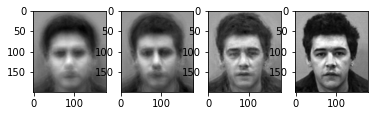

In [9]:
face_obj= FacialRec()
#mean = np.dot(face_obj.U[:,:100],face_obj.project(face_obj.Fbar[:,99],100))+face_obj.mu
#show(mean)

image_100 = face_obj.Fbar[:,99]
s_val = [5,25,75,125]
i=1
for s in s_val:
    val = face_obj.project(image_100,s)
    f_tilde = np.dot(face_obj.U[:,:s],val)+face_obj.mu
    plt.subplot(1,4,i)
    show(f_tilde)
    i+=1

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

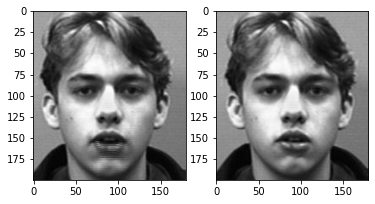

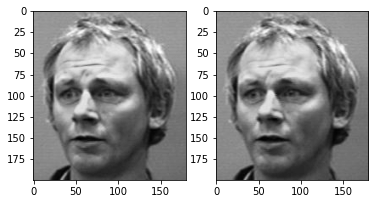

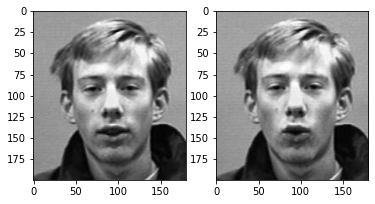

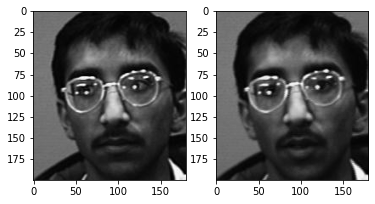

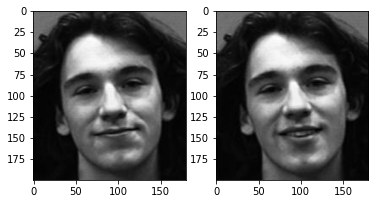

In [10]:
face_obj = FacialRec()
i = 1
for test_image in sample_faces(5):
    face_obj.match(test_image)
    plt.show()